In [134]:
# Import libraries
import pandas as pd
import re
import nltk
from bs4 import BeautifulSoup
import sklearn
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer #Count vectorizer for bag of words
from nltk.sentiment import SentimentIntensityAnalyzer
from matplotlib import pyplot as plt

In [135]:
#Read the data
df = pd.read_csv("./tweets.csv")
print (df.shape)
df.head(5)

(4999, 5)


,user_location,user_description,text,hashtags,source
0,"Udupi, India",Trying to be mediocre in many things,Let the party begin\n#Tokyo2020,['Tokyo2020'],Twitter for Android
1,"Manipur, India",Indian weightlifter 48 kg category. Champion🏆,Congratulations #Tokyo2020 https://t.co/8OFKMs...,['Tokyo2020'],Twitter for Android
2,Global,All breaking news related to Financial Market....,Big Breaking Now \n\nTokyo Olympic Update \n\n...,NaN,Twitter for Android
3,Lausanne,Official International Hockey Federation Twitt...,Q4: 🇬🇧3-1🇿🇦\n\nGreat Britain finally find a wa...,NaN,Twitter Web App
4,Australia,Football & Tennis Coach,All I can think of every time I watch the ring...,"['Tokyo2020', 'ArtisticGymnastics', '7Olympics...",Twitter for iPhone


In [136]:
# get the text col only
df = df[['text']]
print(df.shape)
df.head(5)

(4999, 1)


,text
0,Let the party begin\n#Tokyo2020
1,Congratulations #Tokyo2020 https://t.co/8OFKMs...
2,Big Breaking Now \n\nTokyo Olympic Update \n\n...
3,Q4: 🇬🇧3-1🇿🇦\n\nGreat Britain finally find a wa...
4,All I can think of every time I watch the ring...


In [137]:
# As the data is not labelled, get the sentiment using sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral"

In [138]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

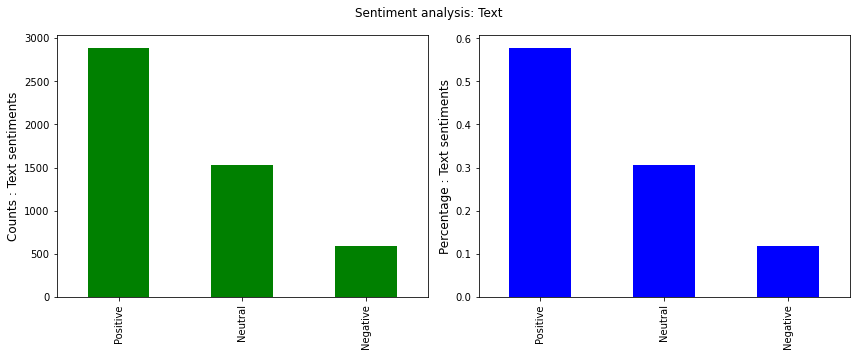

In [139]:
# Show the sentiment using graph
df['text_sentiment'] = df['text'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'text_sentiment', 'Text')

In [140]:
df.head(5)

,text,text_sentiment
0,Let the party begin\n#Tokyo2020,Positive
1,Congratulations #Tokyo2020 https://t.co/8OFKMs...,Positive
2,Big Breaking Now \n\nTokyo Olympic Update \n\n...,Positive
3,Q4: 🇬🇧3-1🇿🇦\n\nGreat Britain finally find a wa...,Positive
4,All I can think of every time I watch the ring...,Neutral


In [115]:
#Data Cleaning

#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Apply function on review column
df['text']=df['text'].apply(denoise_text)

#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Apply function on review column
df['text']=df['text'].apply(remove_special_characters)

In [116]:
#Stemming the text

def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
df['text']=df['text'].apply(simple_stemmer)

In [117]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

english_stop_words = nltk.corpus.stopwords.words('english')
print(len(english_stop_words))
print (english_stop_words[:20])

#remove stopwords
def remove_stop_words(text):
    for stopword in english_stop_words:
        stopword = ' ' + stopword + ' '
        text = text.replace(stopword, ' ')
    return text
 
df['text'] = df['text'].apply(remove_stop_words)

{'no', "that'll", 'below', 're', 'between', 'having', 'here', "won't", 'under', 'very', 'over', 'at', 'once', 'be', 'haven', 'd', 'what', 'after', 'did', 'out', "hasn't", 'above', 'we', 'needn', 'any', 'same', 'hadn', "you're", 'mustn', 'ours', 'hers', 'by', "mightn't", 'than', "needn't", 'before', 'with', 'his', 'them', 'off', 'he', 'can', "hadn't", 'which', 'this', 'or', 'just', 'am', 'both', 'don', 'had', "should've", 'shan', 'you', 'into', 'too', 'where', 'weren', 'they', 'my', "you'll", 'other', 'it', 'more', 'wouldn', 'then', 'few', 'have', 'won', 'of', 'isn', 'do', "haven't", 'why', 'shouldn', 'each', 'she', 'theirs', 'should', 'about', 'are', 'him', 'such', 'yourselves', 'o', "shouldn't", 'from', 'those', 'there', 'couldn', 'down', 'so', 'who', 'aren', "isn't", 'our', 'to', 'a', 'm', 'if', 'was', 'until', 'your', 'didn', 'me', 'an', 'itself', 'their', 'own', 'further', "mustn't", 'all', "didn't", 'not', "doesn't", 'were', "wouldn't", 'only', 'himself', "she's", 'her', 'ourselve

In [119]:
df.head(5)

,text,text_sentiment
0,let parti begin tokyo2020,Positive
1,congratul tokyo2020 httpstco8ofkms9ukq,Positive
2,big break tokyo olymp updat japan hi first gol...,Positive
3,q4 31 great britain final find way way pieters...,Positive
4,all think everi time watch ring event tokyo202...,Neutral


In [120]:
#divide our dataset into training and test
tweets_train = df[:4000]
tweets_test = df[4000:]

In [121]:
#fit our vectorizer on the training data and use it to transform the test data
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,1))
tf_features_train = vectorizer.fit_transform(tweets_train['text'])
tf_features_test = vectorizer.transform(tweets_test['text'])
print (tf_features_train.shape, tf_features_test.shape)

(4000, 8932) (999, 8932)


In [123]:
# Labels
train_labels = [1 if sentiment=='Positive' else 0 for sentiment in tweets_train['text_sentiment']]
test_labels = [1 if sentiment=='Positive' else 0 for sentiment in tweets_test['text_sentiment']]
print (len(train_labels), len(test_labels))


4000 999


In [125]:
# Logistic regression
clf = sklearn.linear_model.LogisticRegression()
clf.fit(tf_features_train, train_labels)
print (clf)
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Positive']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

LogisticRegression()
              precision    recall  f1-score   support

    Negative       0.81      0.90      0.85       391
    Positive       0.93      0.87      0.90       608

    accuracy                           0.88       999
   macro avg       0.87      0.88      0.88       999
weighted avg       0.88      0.88      0.88       999

[[352  39]
 [ 82 526]]


In [126]:
#SVM
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,1))
tf_features_train = vectorizer.fit_transform(tweets_train['text'])
tf_features_test = vectorizer.transform(tweets_test['text'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = sklearn.svm.LinearSVC()
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Positive']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

(4000, 8932) (999, 8932)
              precision    recall  f1-score   support

    Negative       0.82      0.87      0.85       391
    Positive       0.91      0.88      0.90       608

    accuracy                           0.88       999
   macro avg       0.87      0.88      0.87       999
weighted avg       0.88      0.88      0.88       999

[[341  50]
 [ 74 534]]


In [127]:
# naive Bayes
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,1))
tf_features_train = vectorizer.fit_transform(tweets_train['text'])
tf_features_test = vectorizer.transform(tweets_test['text'])
print (tf_features_train.shape, tf_features_test.shape)

clf = MultinomialNB()
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Positive']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

(4000, 8932) (999, 8932)
              precision    recall  f1-score   support

    Negative       0.76      0.74      0.75       391
    Positive       0.84      0.85      0.84       608

    accuracy                           0.81       999
   macro avg       0.80      0.79      0.80       999
weighted avg       0.81      0.81      0.81       999

[[291 100]
 [ 94 514]]
